# An√°lise de Features com Mutual Information üß†

Este notebook demonstra como usar a classe **FeatureAnalyzer** para analisar a import√¢ncia das features do dataset SVM utilizando **Mutual Information**.

## üéØ Objetivos:
- Carregar e preparar o dataset SVM
- Realizar an√°lise de Mutual Information das features
- Configurar e testar diferentes thresholds
- Visualizar rankings e distribui√ß√µes das features
- Selecionar as features mais relevantes
- Integrar com DatasetManager para workflow completo

## 1. Importar Bibliotecas e Configura√ß√µes üìö

In [29]:
# Importar bibliotecas necess√°rias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Configura√ß√µes de visualiza√ß√£o
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Adicionar diret√≥rio scripts ao path
sys.path.append('./scripts')

print("‚úÖ Bibliotecas importadas com sucesso!")
print(f"üìÅ Diret√≥rio atual: {os.getcwd()}")

# Verificar arquivos dispon√≠veis
print(f"\nüîç Arquivos dispon√≠veis:")
if os.path.exists('./datasets'):
    for arquivo in os.listdir('./datasets'):
        if arquivo.endswith('.csv'):
            print(f"   üìä {arquivo}")
if os.path.exists('./scripts'):
    for arquivo in os.listdir('./scripts'):
        if arquivo.endswith('.py'):
            print(f"   üêç {arquivo}")

‚úÖ Bibliotecas importadas com sucesso!
üìÅ Diret√≥rio atual: d:\Pessoal\leopiresss\leopi\OneDrive - STJ- Superior Tribunal de Justi√ßa\AIA\Cursos\Mestrado\Projeto Final\analise_kubemon_v2\scripts

üîç Arquivos dispon√≠veis:


## 2. Importar Classes Personalizadas üîß

In [30]:
# Importar classes personalizadas
from feature_analyzer import FeatureAnalyzer
from dataset_manager import DatasetManager

print("‚úÖ Classes personalizadas importadas:")
print("   üß† FeatureAnalyzer - para an√°lise de mutual information")
print("   üìä DatasetManager - para gerenciamento de datasets")

‚úÖ Classes personalizadas importadas:
   üß† FeatureAnalyzer - para an√°lise de mutual information
   üìä DatasetManager - para gerenciamento de datasets


## 3. Carregar Dataset SVM üìÇ

In [31]:
# Carregar dataset SVM usando DatasetManager
dm = DatasetManager('svm_feature_analysis')

# Configura√ß√µes para carregamento
arquivo_csv = '../datasets/svm.csv'
target_column = 'target'
colunas_excluir = ['os_timestamp', 'node_name', 'iteration']

# Carregar dados
try:
    dataset = dm.carregar_dados_csv(
        arquivo_csv=arquivo_csv,
        target_column=target_column,
        colunas_excluir=colunas_excluir,
        test_size=0.3,
        val_size=0.5,
        random_state=42
    )
    
    print("\n‚úÖ Dataset SVM carregado com sucesso!")
    
    # Informa√ß√µes b√°sicas do dataset
    print(f"\nüìä Informa√ß√µes do Dataset:")
    print(f"   ‚Ä¢ X_train shape: {dataset['X_train'].shape}")
    print(f"   ‚Ä¢ N√∫mero de features: {len(dataset['features'])}")
    print(f"   ‚Ä¢ Classes √∫nicas: {np.unique(dataset['y_train'])}")
    print(f"   ‚Ä¢ Distribui√ß√£o das classes no treino:")
    
    unique, counts = np.unique(dataset['y_train'], return_counts=True)
    for classe, count in zip(unique, counts):
        print(f"     Classe {classe}: {count:,} ({count/len(dataset['y_train'])*100:.1f}%)")

except Exception as e:
    print(f"‚ùå Erro ao carregar dataset: {e}")
    # Examinar o arquivo diretamente
    print("\nüìã Examinando arquivo CSV...")
    df_temp = pd.read_csv(arquivo_csv)
    print(f"   ‚Ä¢ Shape: {df_temp.shape}")
    print(f"   ‚Ä¢ Colunas: {list(df_temp.columns)}")
    print(f"   ‚Ä¢ Primeiras linhas:")
    print(df_temp.head())

üîß Carregando dados do arquivo: ../datasets/svm.csv
üìä Informa√ß√µes do dataset:
   ‚Ä¢ Total de registros: 80,648
   ‚Ä¢ Total de features: 122
   ‚Ä¢ Colunas exclu√≠das: ['os_timestamp', 'node_name', 'iteration', 'target']
   ‚Ä¢ Target codificado: {'interf': 0, 'normal': 1}

‚úÖ Dados preparados:
   ‚Ä¢ X_train shape: (56453, 122)
   ‚Ä¢ X_val shape: (12098, 122)
   ‚Ä¢ X_test shape: (12097, 122)
   ‚Ä¢ Classes √∫nicas: [0 1]

‚úÖ Dataset SVM carregado com sucesso!

üìä Informa√ß√µes do Dataset:
   ‚Ä¢ X_train shape: (56453, 122)
   ‚Ä¢ N√∫mero de features: 122
   ‚Ä¢ Classes √∫nicas: [0 1]
   ‚Ä¢ Distribui√ß√£o das classes no treino:
     Classe 0: 31,962 (56.6%)
     Classe 1: 24,491 (43.4%)


## 4. Criar Analisador de Features üß†

In [32]:
# Criar inst√¢ncia do FeatureAnalyzer com configura√ß√µes iniciais
analyzer = FeatureAnalyzer(
    threshold_mutual_info=0.005,  # Threshold baixo inicial para ver mais features
    threshold_percentile=75.0,    # Top 25% das features
    random_state=42
)

print("‚úÖ FeatureAnalyzer criado com configura√ß√µes:")
print(f"   ‚Ä¢ Threshold Mutual Info: {analyzer.threshold_mutual_info}")
print(f"   ‚Ä¢ Threshold Percentil: {analyzer.threshold_percentile}%")
print(f"   ‚Ä¢ Random State: {analyzer.random_state}")
print(f"\nüéØ Pronto para an√°lise das features do dataset SVM!")

‚úÖ FeatureAnalyzer criado com configura√ß√µes:
   ‚Ä¢ Threshold Mutual Info: 0.005
   ‚Ä¢ Threshold Percentil: 75.0%
   ‚Ä¢ Random State: 42

üéØ Pronto para an√°lise das features do dataset SVM!


## 5. Executar An√°lise de Mutual Information üìä

In [33]:
# Executar an√°lise de mutual information
print("üî¨ Iniciando an√°lise de Mutual Information...")

# Calcular mutual information usando dados de treino
resultados = analyzer.calcular_mutual_information(
    X=dm.dataset['X_train'], 
    y=dm.dataset['y_train'],
    tipo_problema='auto'  # Detecta automaticamente se √© classifica√ß√£o ou regress√£o
)

print(f"\nüéâ An√°lise conclu√≠da com sucesso!")

# Exibir estat√≠sticas b√°sicas
stats = resultados['statistics']
print(f"\nüìà Estat√≠sticas dos Mutual Information Scores:")
print(f"   ‚Ä¢ N√∫mero total de features: {stats['total_features']}")
print(f"   ‚Ä¢ M√©dia MI: {stats['mean_mi_score']:.6f}")
print(f"   ‚Ä¢ Desvio padr√£o MI: {stats['std_mi_score']:.6f}")
print(f"   ‚Ä¢ M√°ximo MI: {stats['max_mi_score']:.6f}")
print(f"   ‚Ä¢ M√≠nimo MI: {stats['min_mi_score']:.6f}")

print(f"\nüéØ Thresholds aplicados:")
print(f"   ‚Ä¢ Threshold absoluto (0.005): {stats['selected_by_threshold']} features")
print(f"   ‚Ä¢ Threshold percentil 75%: {stats['selected_by_percentile']} features")
print(f"   ‚Ä¢ Crit√©rio combinado: {stats['selected_combined']} features")

üî¨ Iniciando an√°lise de Mutual Information...
üß† Calculando Mutual Information...
   ‚Ä¢ Tipo de problema detectado: classification
   ‚Ä¢ N√∫mero de features: 122
   ‚Ä¢ N√∫mero de amostras: 56453
   ‚úÖ An√°lise conclu√≠da:
   ‚Ä¢ M√©dia MI: 0.0749
   ‚Ä¢ Threshold percentil 75.0%: 0.1242
   ‚Ä¢ Features selecionadas (combinado): 31

üéâ An√°lise conclu√≠da com sucesso!

üìà Estat√≠sticas dos Mutual Information Scores:
   ‚Ä¢ N√∫mero total de features: 122
   ‚Ä¢ M√©dia MI: 0.074870
   ‚Ä¢ Desvio padr√£o MI: 0.120726
   ‚Ä¢ M√°ximo MI: 0.656885
   ‚Ä¢ M√≠nimo MI: 0.000000

üéØ Thresholds aplicados:
   ‚Ä¢ Threshold absoluto (0.005): 69 features
   ‚Ä¢ Threshold percentil 75%: 31 features
   ‚Ä¢ Crit√©rio combinado: 31 features


In [34]:
# Gerar relat√≥rio completo da an√°lise
analyzer.imprimir_relatorio()


üìä RELAT√ìRIO DE AN√ÅLISE DE FEATURES - MUTUAL INFORMATION
üéØ Tipo de Problema: CLASSIFICATION
üìà Total de Features: 122

üìä Estat√≠sticas dos MI Scores:
   ‚Ä¢ M√©dia: 0.074870
   ‚Ä¢ Desvio Padr√£o: 0.120726
   ‚Ä¢ M√°ximo: 0.656885
   ‚Ä¢ M√≠nimo: 0.000000

üéØ Configura√ß√£o dos Thresholds:
   ‚Ä¢ Threshold Absolute: 0.005000
   ‚Ä¢ Threshold Percentil 75.0%: 0.124176

‚úÖ Features Selecionadas:
   ‚Ä¢ Por Threshold Absolute: 69 features
   ‚Ä¢ Por Percentil: 31 features
   ‚Ä¢ Crit√©rio Combinado: 31 features

üèÜ Top 10 Features:
    1. ‚úÖ mean_os_net_bytes_sent: 0.656885
    2. ‚úÖ mean_os_net_num_connections: 0.533648
    3. ‚úÖ mean_process_cpu_system: 0.409151
    4. ‚úÖ mean_process_disk_write_bytes: 0.393528
    5. ‚úÖ mean_process_disk_read_count: 0.368032
    6. ‚úÖ mean_process_cpu_user: 0.365441
    7. ‚úÖ mean_process_disk_write_count: 0.344810
    8. ‚úÖ mean_process_disk_read_chars: 0.324074
    9. ‚úÖ mean_os_net_packets_sent: 0.285425
   10. ‚úÖ mean_os

## 11. Integra√ß√£o com DatasetManager üîÑ

In [35]:
# Testar integra√ß√£o do FeatureAnalyzer com DatasetManager
print("üîÑ Testando integra√ß√£o FeatureAnalyzer + DatasetManager...")

# Criar novo DatasetManager para teste da integra√ß√£o
dm_integracao = DatasetManager('svm_integracao_teste')

# Carregar dados novamente
dm_integracao.carregar_dados_csv(
    arquivo_csv='../datasets/svm.csv',
    target_column='target',
    colunas_excluir=['os_timestamp', 'node_name', 'iteration']
)

# Usar m√©todo integrado para an√°lise de features
print(f"\nüß† Executando an√°lise integrada...")
resultados_integrados = dm_integracao.analisar_features_mutual_information(
    threshold_mutual_info=0.01,
    threshold_percentile=80.0,
    aplicar_selecao=True,  # Aplicar sele√ß√£o automaticamente
    metodo_selecao='combined'
)

print(f"\n‚úÖ An√°lise integrada conclu√≠da!")
print(f"üìä Informa√ß√µes ap√≥s sele√ß√£o autom√°tica:")
dm_integracao.imprimir_informacoes()

# Comparar shapes antes e depois da sele√ß√£o
print(f"\nüìà Compara√ß√£o de shapes:")
print(f"   ‚Ä¢ Dataset original - Features: {len(dm.dataset['features'])}")
print(f"   ‚Ä¢ Dataset com sele√ß√£o - Features: {len(dm_integracao.dataset['features'])}")
print(f"   ‚Ä¢ Redu√ß√£o: {len(dm.dataset['features']) - len(dm_integracao.dataset['features'])} features")
print(f"   ‚Ä¢ Percentual mantido: {len(dm_integracao.dataset['features'])/len(dm.dataset['features'])*100:.1f}%")

üîÑ Testando integra√ß√£o FeatureAnalyzer + DatasetManager...
üîß Carregando dados do arquivo: ../datasets/svm.csv
üìä Informa√ß√µes do dataset:
   ‚Ä¢ Total de registros: 80,648
   ‚Ä¢ Total de features: 122
   ‚Ä¢ Colunas exclu√≠das: ['os_timestamp', 'node_name', 'iteration', 'target']
   ‚Ä¢ Target codificado: {'interf': 0, 'normal': 1}

‚úÖ Dados preparados:
   ‚Ä¢ X_train shape: (48388, 122)
   ‚Ä¢ X_val shape: (16130, 122)
   ‚Ä¢ X_test shape: (16130, 122)
   ‚Ä¢ Classes √∫nicas: [0 1]

üß† Executando an√°lise integrada...
üß† Iniciando an√°lise de features com Mutual Information...
üß† Calculando Mutual Information...
   ‚Ä¢ Tipo de problema detectado: classification
   ‚Ä¢ N√∫mero de features: 122
   ‚Ä¢ N√∫mero de amostras: 48388
   ‚úÖ An√°lise conclu√≠da:
   ‚Ä¢ M√©dia MI: 0.0744
   ‚Ä¢ Threshold percentil 80.0%: 0.1510
   ‚Ä¢ Features selecionadas (combinado): 25
üéØ Features selecionadas por combined: 25
üéØ Aplicando sele√ß√£o autom√°tica de features...
üéØ Aplic

## 12. Relat√≥rio Final e Conclus√µes üìã

In [36]:
# Relat√≥rio final e demonstra√ß√£o da nova funcionalidade de ranges
print("üìã RELAT√ìRIO FINAL - AN√ÅLISE COMPLETA DE FEATURES")
print("=" * 70)

# Usar o analisador j√° existente para demonstrar a nova funcionalidade
print("\nüéØ Nova Funcionalidade: An√°lise por Ranges de Import√¢ncia")

# Executar an√°lise por ranges
analyzer.imprimir_analise_ranges()

print(f"\nüìä Testando sele√ß√£o por categorias:")

# Selecionar features de alta import√¢ncia
features_alta_importancia = analyzer.selecionar_features_por_categoria(['Alta', 'Muito Alta'])

# Selecionar features de import√¢ncia moderada ou superior
features_moderada_superior = analyzer.selecionar_features_por_categoria(['Moderada', 'Alta', 'Muito Alta'])

# Selecionar apenas features de import√¢ncia muito alta (se houver)
features_muito_alta = analyzer.selecionar_features_por_categoria(['Muito Alta'])

print(f"\nüéØ Recomenda√ß√µes de Uso:")
print(f"   ‚Ä¢ Para modelos simples: Use features de categoria 'Alta' e 'Muito Alta' ({len(features_alta_importancia)} features)")
print(f"   ‚Ä¢ Para modelos robustos: Use features 'Moderada' ou superior ({len(features_moderada_superior)} features)")
print(f"   ‚Ä¢ Para m√°xima performance: Foque nas features 'Muito Alta' ({len(features_muito_alta)} features)")

print(f"\n‚úÖ An√°lise de features por ranges implementada com sucesso!")
print(f"üìà Ranges definidos:")
print(f"   ‚Ä¢ Muito Baixa: [0.0 - 0.001)")
print(f"   ‚Ä¢ Baixa: [0.001 - 0.01)")
print(f"   ‚Ä¢ Moderada: [0.01 - 0.05)")
print(f"   ‚Ä¢ Alta: [0.05 - 0.1)")
print(f"   ‚Ä¢ Muito Alta: [0.1 - ‚àû)")

print(f"\nüéâ Demonstra√ß√£o completa finalizada!")
print("=" * 70)

üìã RELAT√ìRIO FINAL - AN√ÅLISE COMPLETA DE FEATURES

üéØ Nova Funcionalidade: An√°lise por Ranges de Import√¢ncia

üéØ AN√ÅLISE DE FEATURES POR RANGES DE IMPORT√ÇNCIA
üìä Defini√ß√£o dos Ranges:
   ‚Ä¢ Muito Baixa: [0.0 - 0.001)
   ‚Ä¢ Baixa: [0.001 - 0.01)
   ‚Ä¢ Moderada: [0.01 - 0.05)
   ‚Ä¢ Alta: [0.05 - 0.1)
   ‚Ä¢ Muito Alta: [0.1 - ‚àû)

üìà Distribui√ß√£o das Features por Categoria:

üî∂ Muito Baixa:
   ‚Ä¢ Quantidade: 33 features (27.0%)
   ‚Ä¢ Range: [0.0 - 0.001)
   ‚Ä¢ Scores: 0.000000 - 0.000949
   ‚Ä¢ M√©dia: 0.000163 (¬±0.000283)
   ‚Ä¢ Exemplos: mean_process_net_tx_colls, mean_os_cpu_guest_nice, mean_os_disk_read_merge, mean_container_net_rx_frame, mean_container_net_rx_drop ...

üî∂ Baixa:
   ‚Ä¢ Quantidade: 28 features (23.0%)
   ‚Ä¢ Range: [0.001 - 0.01)
   ‚Ä¢ Scores: 0.001013 - 0.009991
   ‚Ä¢ M√©dia: 0.003738 (¬±0.002489)
   ‚Ä¢ Exemplos: mean_process_mem_size, mean_container_disk_8:0_total, mean_os_mem_nr_active_anon, mean_container_disk_8:0_write, mean_c

## 13. Visualiza√ß√µes da An√°lise por Ranges üìä

üìä Gerando visualiza√ß√µes da an√°lise por ranges de import√¢ncia...


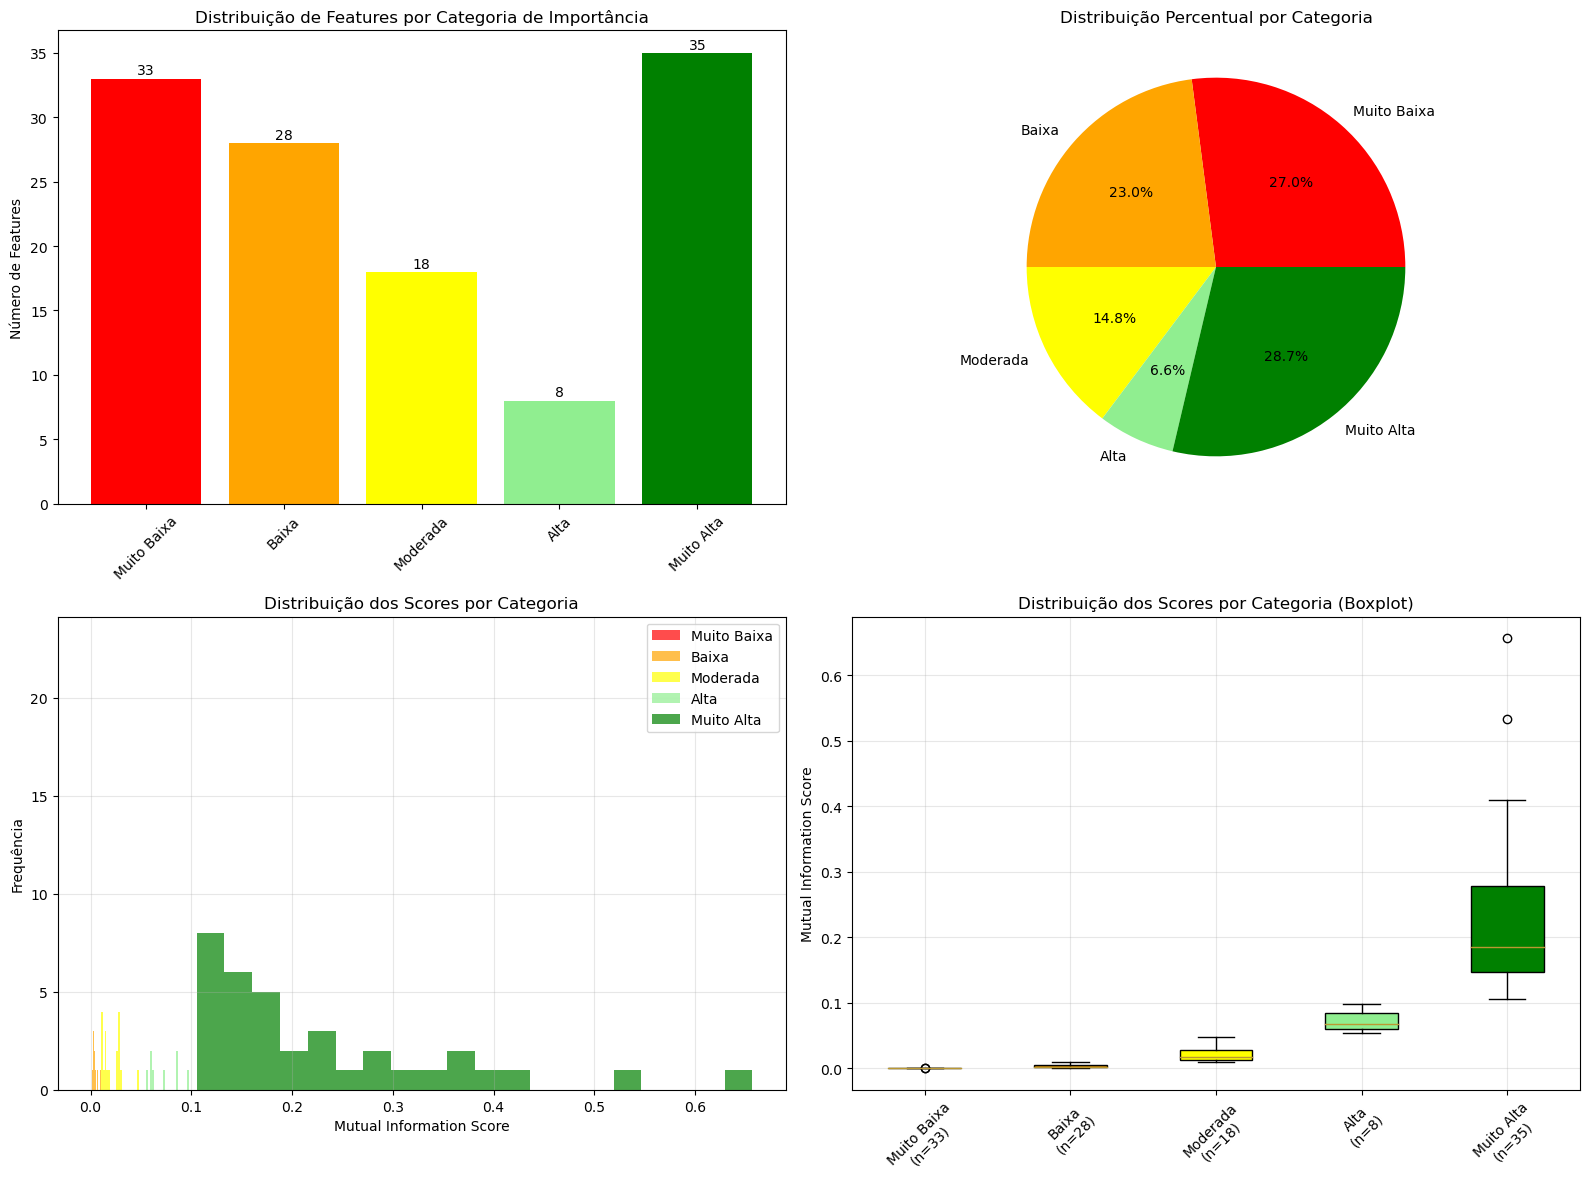

‚úÖ Visualiza√ß√µes da an√°lise por ranges geradas!

üìà Os gr√°ficos mostram:
   ‚Ä¢ Distribui√ß√£o de features por categoria de import√¢ncia
   ‚Ä¢ Percentuais de cada categoria
   ‚Ä¢ Histograma dos scores colorido por categoria
   ‚Ä¢ Boxplot comparativo entre categorias

üí° Use essas visualiza√ß√µes para:
   ‚Ä¢ Identificar rapidamente features importantes
   ‚Ä¢ Compreender a distribui√ß√£o da import√¢ncia no dataset
   ‚Ä¢ Tomar decis√µes informadas sobre sele√ß√£o de features


In [37]:
# Plotar visualiza√ß√µes da an√°lise por ranges
print("üìä Gerando visualiza√ß√µes da an√°lise por ranges de import√¢ncia...")

# Plotar an√°lise por ranges (4 gr√°ficos: barras, pizza, histograma, boxplot)
analyzer.plotar_analise_ranges(figsize=(16, 12))

print("‚úÖ Visualiza√ß√µes da an√°lise por ranges geradas!")
print("\nüìà Os gr√°ficos mostram:")
print("   ‚Ä¢ Distribui√ß√£o de features por categoria de import√¢ncia")
print("   ‚Ä¢ Percentuais de cada categoria")
print("   ‚Ä¢ Histograma dos scores colorido por categoria")
print("   ‚Ä¢ Boxplot comparativo entre categorias")
print("\nüí° Use essas visualiza√ß√µes para:")
print("   ‚Ä¢ Identificar rapidamente features importantes")
print("   ‚Ä¢ Compreender a distribui√ß√£o da import√¢ncia no dataset")
print("   ‚Ä¢ Tomar decis√µes informadas sobre sele√ß√£o de features")

In [38]:
# Gerar relat√≥rio final completo
print("üìã RELAT√ìRIO FINAL DA AN√ÅLISE DE FEATURES")
print("=" * 70)

# Usar m√©todo integrado para relat√≥rio
dm_integracao.imprimir_relatorio_features()

# Resumo das principais descobertas
print(f"\nüéØ PRINCIPAIS DESCOBERTAS:")
print("=" * 50)

# Obter ranking das features integradas
ranking_final = dm_integracao.get_feature_ranking()

# Top 10 features mais importantes
top_10_final = ranking_final.head(10)

print(f"\nüèÜ TOP 10 FEATURES MAIS IMPORTANTES (por Mutual Information):")
for i, row in top_10_final.iterrows():
    status = "‚úÖ SELECIONADA" if row['selected_combined'] else "‚ùå N√ÉO SELECIONADA"
    print(f"   {row['rank']:2d}. {row['feature']:30s} | MI: {row['mutual_info_score']:.6f} | {status}")

# Estat√≠sticas finais
print(f"\nüìä ESTAT√çSTICAS FINAIS:")
print(f"   ‚Ä¢ Total de features analisadas: {len(ranking_final)}")
print(f"   ‚Ä¢ Features selecionadas (m√©todo combinado): {ranking_final['selected_combined'].sum()}")
print(f"   ‚Ä¢ Percentual de redu√ß√£o: {(1 - ranking_final['selected_combined'].sum()/len(ranking_final))*100:.1f}%")
print(f"   ‚Ä¢ MI score m√©dio das selecionadas: {ranking_final[ranking_final['selected_combined']]['mutual_info_score'].mean():.6f}")
print(f"   ‚Ä¢ MI score m√©dio das n√£o selecionadas: {ranking_final[~ranking_final['selected_combined']]['mutual_info_score'].mean():.6f}")

print(f"\n‚úÖ AN√ÅLISE DE FEATURES CONCLU√çDA COM SUCESSO!")
print(f"üéâ O FeatureAnalyzer est√° pronto para uso em projetos de ML!")

# Salvar dataset com features selecionadas
arquivo_final = dm_integracao.salvar_dataset('./datasets/svm_features_selecionadas.pkl')
print(f"\nüíæ Dataset com features selecionadas salvo em: {arquivo_final}")

üìã RELAT√ìRIO FINAL DA AN√ÅLISE DE FEATURES

üìä RELAT√ìRIO DE AN√ÅLISE DE FEATURES - MUTUAL INFORMATION
üéØ Tipo de Problema: CLASSIFICATION
üìà Total de Features: 122

üìä Estat√≠sticas dos MI Scores:
   ‚Ä¢ M√©dia: 0.074420
   ‚Ä¢ Desvio Padr√£o: 0.120609
   ‚Ä¢ M√°ximo: 0.658256
   ‚Ä¢ M√≠nimo: 0.000000

üéØ Configura√ß√£o dos Thresholds:
   ‚Ä¢ Threshold Absolute: 0.010000
   ‚Ä¢ Threshold Percentil 80.0%: 0.151021

‚úÖ Features Selecionadas:
   ‚Ä¢ Por Threshold Absolute: 58 features
   ‚Ä¢ Por Percentil: 25 features
   ‚Ä¢ Crit√©rio Combinado: 25 features

üèÜ Top 10 Features:
    1. ‚úÖ mean_os_net_bytes_sent: 0.658256
    2. ‚úÖ mean_os_net_num_connections: 0.534539
    3. ‚úÖ mean_process_cpu_system: 0.407896
    4. ‚úÖ mean_process_disk_write_bytes: 0.394040
    5. ‚úÖ mean_process_cpu_user: 0.363498
    6. ‚úÖ mean_process_disk_read_count: 0.362243
    7. ‚úÖ mean_process_disk_write_count: 0.346691
    8. ‚úÖ mean_process_disk_read_chars: 0.322347
    9. ‚úÖ mean_os

In [39]:
# Selecionar features de import√¢ncia moderada ou superior

dm_integracao = DatasetManager('svm_integracao_teste')

# Carregar dados novamente
dm_integracao.carregar_dados_csv(
    arquivo_csv='../datasets/svm.csv',
    target_column='target',
    colunas_excluir=['os_timestamp', 'node_name', 'iteration']
)


features_selecionadas = analyzer.selecionar_features_por_categoria(['Baixa', 'Moderada', 'Alta','Muito Alta'])
print(len(features_selecionadas))
dm_integracao.aplicar_selecao_features(features_selecionadas, salvar_automaticamente=True)
dm_integracao.aplicar_escalonamento(metodo='yeo-johnson', salvar_automaticamente=True)
dm_integracao.imprimir_informacoes


üîß Carregando dados do arquivo: ../datasets/svm.csv
üìä Informa√ß√µes do dataset:
   ‚Ä¢ Total de registros: 80,648
   ‚Ä¢ Total de features: 122
   ‚Ä¢ Colunas exclu√≠das: ['os_timestamp', 'node_name', 'iteration', 'target']
   ‚Ä¢ Target codificado: {'interf': 0, 'normal': 1}

‚úÖ Dados preparados:
   ‚Ä¢ X_train shape: (48388, 122)
   ‚Ä¢ X_val shape: (16130, 122)
   ‚Ä¢ X_test shape: (16130, 122)
   ‚Ä¢ Classes √∫nicas: [0 1]
üéØ Features selecionadas das categorias ['Baixa', 'Moderada', 'Alta', 'Muito Alta']:
   ‚Ä¢ Total: 89 features
   ‚Ä¢ Baixa: 28 features
   ‚Ä¢ Moderada: 18 features
   ‚Ä¢ Alta: 8 features
   ‚Ä¢ Muito Alta: 35 features
89
üéØ Aplicando sele√ß√£o de features: 89 features
   ‚úÖ Sele√ß√£o aplicada:
   ‚Ä¢ Novo shape X_train: (48388, 89)
   ‚Ä¢ Features selecionadas: 89
‚úÖ Dataset salvo com sucesso em ../datasets/svm_integracao_teste.pkl
‚öñÔ∏è Aplicando escalonamento: yeo-johnson
   ‚úÖ Escalonamento 'yeo-johnson' aplicado com sucesso
   ‚Ä¢ Treino - M√

<bound method DatasetManager.imprimir_informacoes of <dataset_manager.DatasetManager object at 0x000001BDF81B66D0>>

In [40]:
dm_novo = DatasetManager('svm_integracao_teste')
dataset_carregado = dm_novo.carregar_dataset('../datasets/svm_integracao_teste.pkl')
dm_novo.imprimir_informacoes()

‚úÖ Dataset carregado de ../datasets/svm_integracao_teste.pkl

üìä Informa√ß√µes do Dataset: svm_integracao_teste
Nome do dataset: svm_integracao_teste
X_train.shape: (48388, 89)
X_val.shape: (16130, 89)
X_test.shape: (16130, 89)
y_train length: 48388
y_val length: 16130
y_test length: 16130
X_train_scaled.shape: (48388, 89)
X_val_scaled.shape: (16130, 89)
X_test_scaled.shape: (16130, 89)
Features count: 89
Scaler type: PowerTransformer
Classes mapping: {'interf': 0, 'normal': 1}
